In [106]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

## Census Data

In [101]:
census = pd.read_csv('resources/census_data.csv')
census

,County,Name,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate
0,33,"Escambia County, Florida",300795.0,37.4,43918.0,23441.0,50783.0,16.882927
1,53,"Hernando County, Florida",173119.0,48.0,41024.0,21411.0,26352.0,15.221899
2,57,"Hillsborough County, Florida",1257913.0,36.3,49596.0,27149.0,208532.0,16.577617
3,91,"Okaloosa County, Florida",185852.0,37.4,54684.0,28600.0,24183.0,13.011967
4,123,"Taylor County, Florida",22660.0,41.4,36356.0,17045.0,3232.0,14.263019
...,...,...,...,...,...,...,...,...
3216,59,"Hancock County, Indiana",70466.0,39.4,62981.0,28111.0,5289.0,7.505747
3217,67,"Howard County, Indiana",82795.0,41.0,43590.0,24071.0,13596.0,16.421281
3218,17,"Oxford County, Maine",57657.0,45.0,40674.0,21441.0,8399.0,14.567182
3219,1,"Allegany County, Maryland",74394.0,41.2,39293.0,21211.0,11592.0,15.581902


In [102]:
census['Name'] = census['Name'].str.replace(' County', '')
census.rename(columns={'Name': 'county'}, inplace=True)
census.drop('County', axis=1, inplace=True)

census

,county,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate
0,"Escambia, Florida",300795.0,37.4,43918.0,23441.0,50783.0,16.882927
1,"Hernando, Florida",173119.0,48.0,41024.0,21411.0,26352.0,15.221899
2,"Hillsborough, Florida",1257913.0,36.3,49596.0,27149.0,208532.0,16.577617
3,"Okaloosa, Florida",185852.0,37.4,54684.0,28600.0,24183.0,13.011967
4,"Taylor, Florida",22660.0,41.4,36356.0,17045.0,3232.0,14.263019
...,...,...,...,...,...,...,...
3216,"Hancock, Indiana",70466.0,39.4,62981.0,28111.0,5289.0,7.505747
3217,"Howard, Indiana",82795.0,41.0,43590.0,24071.0,13596.0,16.421281
3218,"Oxford, Maine",57657.0,45.0,40674.0,21441.0,8399.0,14.567182
3219,"Allegany, Maryland",74394.0,41.2,39293.0,21211.0,11592.0,15.581902


## Covid Data

In [98]:
covid = pd.read_csv('resources/covid-statistics.csv')
covid

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0
...,...,...,...,...,...,...
2161172,2022-01-28,Sweetwater,Wyoming,56037.0,10133,115.0
2161173,2022-01-28,Teton,Wyoming,56039.0,9272,15.0
2161174,2022-01-28,Uinta,Wyoming,56041.0,5273,34.0
2161175,2022-01-28,Washakie,Wyoming,56043.0,2150,41.0


In [85]:
covid['county'] = covid['county'] + ', ' + covid['state']
covid.drop('state', axis=1, inplace=True)
covid.head()

,date,county,fips,cases,deaths
0,2020-01-21,"Snohomish, Washington",53061.0,1,0.0
1,2020-01-22,"Snohomish, Washington",53061.0,1,0.0
2,2020-01-23,"Snohomish, Washington",53061.0,1,0.0
3,2020-01-24,"Cook, Illinois",17031.0,1,0.0
4,2020-01-24,"Snohomish, Washington",53061.0,1,0.0


In [97]:
covid_total = covid.groupby('county').max().reset_index()

covid_total

,county,date,fips,cases,deaths
0,"Abbeville, South Carolina",2022-01-28,45001.0,6104,57.0
1,"Acadia, Louisiana",2022-01-28,22001.0,14951,269.0
2,"Accomack, Virginia",2022-01-28,51001.0,6569,90.0
3,"Ada, Idaho",2022-01-28,16001.0,103141,915.0
4,"Adair, Iowa",2022-01-28,19001.0,1488,46.0
...,...,...,...,...,...
3272,"Yuma, Arizona",2022-01-28,4027.0,57792,1046.0
3273,"Yuma, Colorado",2022-01-28,8125.0,1703,22.0
3274,"Zapata, Texas",2022-01-28,48505.0,2889,47.0
3275,"Zavala, Texas",2022-01-28,48507.0,3714,58.0


## Merge

In [132]:
merged_df = pd.merge(census, covid_total, on='county')
merged_df

,county,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,date,fips,cases,deaths
0,"Escambia, Florida",300795.0,37.4,43918.0,23441.0,50783.0,16.882927,2022-01-28,12033.0,72938,1127.0
1,"Hernando, Florida",173119.0,48.0,41024.0,21411.0,26352.0,15.221899,2022-01-28,12053.0,38669,973.0
2,"Hillsborough, Florida",1257913.0,36.3,49596.0,27149.0,208532.0,16.577617,2022-01-28,12057.0,346778,3174.0
3,"Okaloosa, Florida",185852.0,37.4,54684.0,28600.0,24183.0,13.011967,2022-01-28,12091.0,47666,592.0
4,"Taylor, Florida",22660.0,41.4,36356.0,17045.0,3232.0,14.263019,2022-01-28,12123.0,6361,87.0
...,...,...,...,...,...,...,...,...,...,...,...
3060,"Hancock, Indiana",70466.0,39.4,62981.0,28111.0,5289.0,7.505747,2022-01-28,18059.0,19786,234.0
3061,"Howard, Indiana",82795.0,41.0,43590.0,24071.0,13596.0,16.421281,2022-01-28,18067.0,24060,406.0
3062,"Oxford, Maine",57657.0,45.0,40674.0,21441.0,8399.0,14.567182,2022-01-28,23017.0,8661,115.0
3063,"Allegany, Maryland",74394.0,41.2,39293.0,21211.0,11592.0,15.581902,2022-01-28,24001.0,15359,319.0


In [133]:
merged_df.drop(['date', 'fips'], axis=1, inplace=True)
merged_df['cases per capita'] = merged_df['cases']/merged_df['Population']
merged_df['deaths per capita'] = merged_df['deaths']/merged_df["Population"]
merged_df.describe()

,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,cases,deaths,cases per capita,deaths per capita
count,3.065000e+03,3065.000000,3065.000000,3065.000000,3.065000e+03,3065.000000,3.065000e+03,3065.000000,3065.000000,3065.000000
mean,9.734678e+04,40.619608,45975.676672,23643.774878,1.439737e+04,15.953564,2.266166e+04,266.856444,0.224169,0.003248
std,3.125312e+05,5.155049,11906.880253,5560.504913,5.134693e+04,6.107941,7.803277e+04,870.172553,0.052717,0.001407
min,7.100000e+01,21.600000,19986.000000,8948.000000,6.000000e+00,0.924499,1.000000e+00,0.000000,0.014085,0.000000
25%,1.098200e+04,37.600000,38328.000000,19929.000000,1.691000e+03,11.591850,2.333000e+03,35.000000,0.191721,0.002309
50%,2.570300e+04,40.600000,44183.000000,22953.000000,4.213000e+03,15.256460,5.784000e+03,85.000000,0.224008,0.003169
75%,6.660600e+04,43.700000,51181.000000,26258.000000,9.939000e+03,19.429168,1.517200e+04,203.000000,0.253897,0.004091
max,9.893481e+06,63.800000,122238.000000,62018.000000,1.737224e+06,44.059192,2.611089e+06,28816.000000,1.183908,0.012987


In [134]:
corr = merged_df.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None)

,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,cases,deaths,cases per capita,deaths per capita
Population,1.000000,-0.184606,0.246864,0.249613,0.970694,-0.059368,0.980074,0.963791,0.050975,-0.112321
Median Age,-0.184606,1.000000,-0.122379,0.121575,-0.190974,-0.228831,-0.183010,-0.158831,-0.332523,0.096337
Household Income,0.246864,-0.122379,1.000000,0.877678,0.127093,-0.748010,0.213986,0.174838,-0.008319,-0.441947
Per Capita Income,0.249613,0.121575,0.877678,1.000000,0.138809,-0.712832,0.211505,0.179318,-0.106910,-0.425271
Poverty Count,0.970694,-0.190974,0.127093,0.138809,1.000000,0.028783,0.965280,0.962411,0.060802,-0.074288
Poverty Rate,-0.059368,-0.228831,-0.748010,-0.712832,0.028783,1.000000,-0.046882,-0.022002,0.074784,0.338019
cases,0.980074,-0.183010,0.213986,0.211505,0.965280,-0.046882,1.000000,0.974297,0.103692,-0.089038
deaths,0.963791,-0.158831,0.174838,0.179318,0.962411,-0.022002,0.974297,1.000000,0.087719,-0.025680
cases per capita,0.050975,-0.332523,-0.008319,-0.106910,0.060802,0.074784,0.103692,0.087719,1.000000,0.206601
deaths per capita,-0.112321,0.096337,-0.441947,-0.425271,-0.074288,0.338019,-0.089038,-0.025680,0.206601,1.000000


## Plots

r-squared: 0.1142568028468885
Regression: y = 7.784013336998872e-05x + 0.002006515743809566


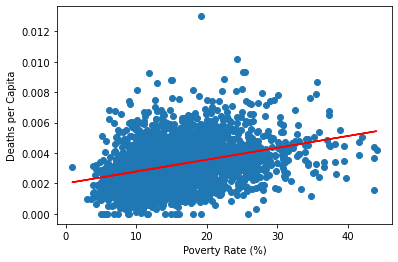

In [122]:
xs = merged_df['Poverty Rate']
ys = merged_df['deaths per capita']

(m, b, r, _, _) = stats.linregress(xs, ys)
print(f"r-squared: {r**2}")
print(f"Regression: y = {m}x + {b}")

regress = [m*x + b for x in xs]

plt.scatter(xs, ys)
plt.plot(xs, regress, 'r-')

plt.xlabel('Poverty Rate (%)')
plt.ylabel('Deaths per Capita')
plt.show()

r-squared: 0.19531723290907546
Regression: y = -5.220711228700923e-08x + 0.0056486006207935036


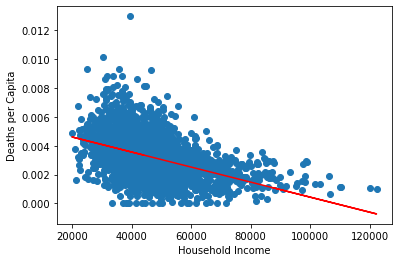

In [123]:
xs = merged_df['Household Income']
ys = merged_df['deaths per capita']

(m, b, r, _, _) = stats.linregress(xs, ys)
print(f"r-squared: {r**2}")
print(f"Regression: y = {m}x + {b}")

regress = [m*x + b for x in xs]

plt.scatter(xs, ys)
plt.plot(xs, regress, 'r-')

plt.xlabel('Household Income')
plt.ylabel('Deaths per Capita')
plt.show()

r-squared: 0.1808554409257138
Regression: y = -1.0757440112893143e-07x + 0.005791808229192287


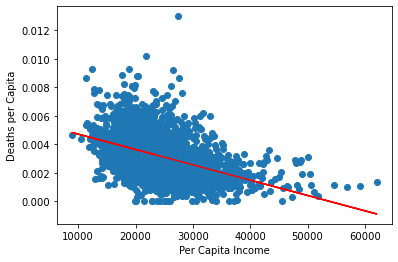

In [124]:
xs = merged_df['Per Capita Income']
ys = merged_df['deaths per capita']

(m, b, r, _, _) = stats.linregress(xs, ys)
print(f"r-squared: {r**2}")
print(f"Regression: y = {m}x + {b}")

regress = [m*x + b for x in xs]

plt.scatter(xs, ys)
plt.plot(xs, regress, 'r-')

plt.xlabel('Per Capita Income')
plt.ylabel('Deaths per Capita')
plt.show()

r-squared: 0.0055926819001863625
Regression: y = 0.0006454605766444108x + 0.213871145490156


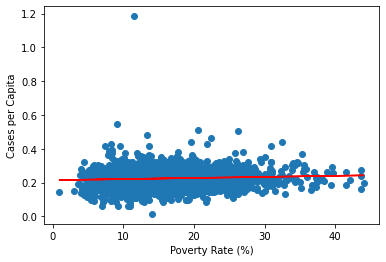

In [125]:
xs = merged_df['Poverty Rate']
ys = merged_df['cases per capita']

(m, b, r, _, _) = stats.linregress(xs, ys)
print(f"r-squared: {r**2}")
print(f"Regression: y = {m}x + {b}")

regress = [m*x + b for x in xs]

plt.scatter(xs, ys)
plt.plot(xs, regress, 'r-')

plt.xlabel('Poverty Rate (%)')
plt.ylabel('Cases per Capita')
plt.show()

r-squared: 6.919931751058286e-05
Regression: y = -3.683048355507892e-08x + 0.22586184862057843


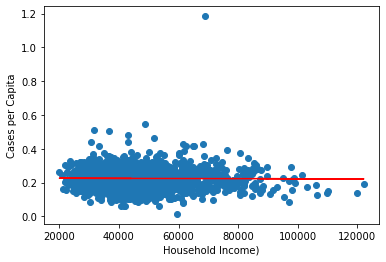

In [126]:
xs = merged_df['Household Income']
ys = merged_df['cases per capita']

(m, b, r, _, _) = stats.linregress(xs, ys)
print(f"r-squared: {r**2}")
print(f"Regression: y = {m}x + {b}")

regress = [m*x + b for x in xs]

plt.scatter(xs, ys)
plt.plot(xs, regress, 'r-')

plt.xlabel('Household Income)')
plt.ylabel('Cases per Capita')
plt.show()

r-squared: 0.012615961404432193
Regression: y = -5.055034850638561e-10x + 0.0032975524443852903


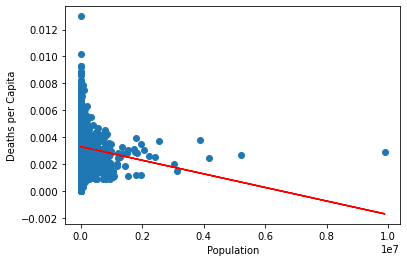

In [127]:
xs = merged_df['Population']
ys = merged_df['deaths per capita']

(m, b, r, _, _) = stats.linregress(xs, ys)
print(f"r-squared: {r**2}")
print(f"Regression: y = {m}x + {b}")

regress = [m*x + b for x in xs]

plt.scatter(xs, ys)
plt.plot(xs, regress, 'r-')

plt.xlabel('Population')
plt.ylabel('Deaths per Capita')
plt.show()

r-squared: 0.00259842531023373
Regression: y = 8.598371830919463e-09x + 0.22333151837990045


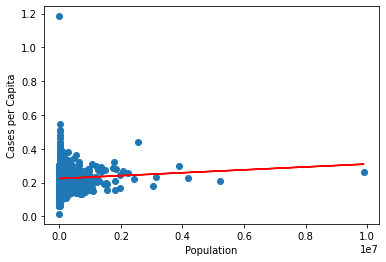

In [128]:
xs = merged_df['Population']
ys = merged_df['cases per capita']

(m, b, r, _, _) = stats.linregress(xs, ys)
print(f"r-squared: {r**2}")
print(f"Regression: y = {m}x + {b}")

regress = [m*x + b for x in xs]

plt.scatter(xs, ys)
plt.plot(xs, regress, 'r-')

plt.xlabel('Population')
plt.ylabel('Cases per Capita')
plt.show()